<a href="https://colab.research.google.com/github/miskeramesalu/AI-for-Software-Engineering-all-assignments/blob/main/nlp_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== NLP ANALYSIS WITH spaCy ===
Tasks: Named Entity Recognition (NER) & Sentiment Analysis
Dataset: Amazon Product Reviews

📥 Loading spaCy model...
✅ spaCy model loaded successfully!

📝 Analyzing 10 product reviews...

🔍 Performing Named Entity Recognition and Sentiment Analysis...

📄 Review 1:
   Text: I absolutely love my new iPhone 14 Pro from Apple. The camera quality is excepti...
   Entities: [('Apple', 'ORG')]
   Sentiment: POSITIVE (➕3 | ➖0)

📄 Review 2:
   Text: Samsung Galaxy S23 has terrible battery life and overheats constantly. Would not...
   Entities: [('Samsung Galaxy S23', 'ORG'), ('Samsung', 'ORG')]
   Sentiment: NEGATIVE (➕0 | ➖2)

📄 Review 3:
   Text: The Sony WH-1000XM4 headphones have amazing noise cancellation and superb sound ...
   Entities: [('Sony', 'ORG'), ('Sony', 'ORG')]
   Sentiment: POSITIVE (➕3 | ➖1)

📄 Review 4:
   Text: Microsoft Surface Pro 9 is decent for work but the keyboard cover is overpriced ...
   Entities: [('Microsoft Surface', 'ORG'), ('Mi

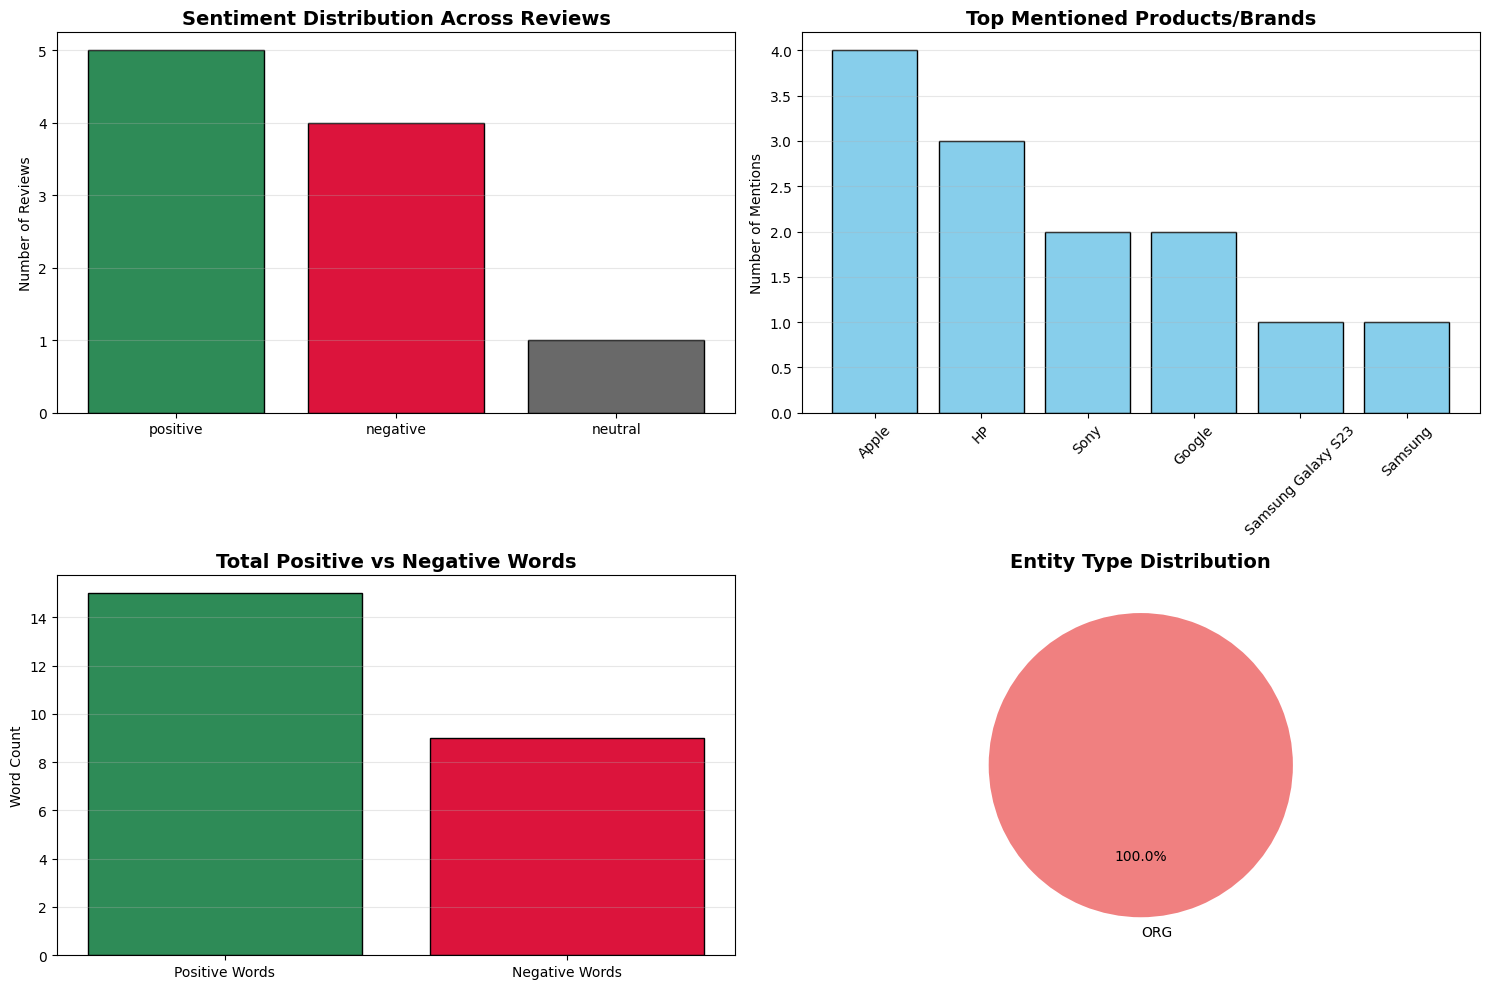


🎯 KEY INSIGHTS:
- Majority sentiment: POSITIVE
- Most mentioned brand: Apple
- Total entities extracted: 17
- Reviews with clear sentiment: 9

✅ Task 3 Completed Successfully!


In [2]:
# NLP Analysis with spaCy - Named Entity Recognition & Sentiment Analysis
# AI Tools Assignment - Part 2, Task 3

import spacy
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import pandas as pd

print("=== NLP ANALYSIS WITH spaCy ===")
print("Tasks: Named Entity Recognition (NER) & Sentiment Analysis")
print("Dataset: Amazon Product Reviews\n")

# Download and load spaCy model
print("📥 Loading spaCy model...")
try:
    nlp = spacy.load("en_core_web_sm")
    print("✅ spaCy model loaded successfully!")
except OSError:
    print("⚠️  Downloading spaCy model...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "spacy", "download", "en_core_web_sm"])
    nlp = spacy.load("en_core_web_sm")

print("\n" + "="*50)

# Sample Amazon reviews dataset
reviews = [
    "I absolutely love my new iPhone 14 Pro from Apple. The camera quality is exceptional and battery life lasts all day! Definitely worth the price.",
    "Samsung Galaxy S23 has terrible battery life and overheats constantly. Would not recommend this product to anyone. Very disappointed with Samsung.",
    "The Sony WH-1000XM4 headphones have amazing noise cancellation and superb sound quality. Best purchase I've made this year! Sony never disappoints.",
    "Microsoft Surface Pro 9 is decent for work but the keyboard cover is overpriced and not very durable. Microsoft should improve accessories.",
    "Google Pixel 7 Pro from Google has an incredible camera but the software has some bugs that need fixing. Overall good phone from Google.",
    "Apple MacBook Pro with M2 chip is fantastic for programming and video editing. Highly recommended! Apple products are always reliable.",
    "This HP laptop stopped working after 2 months. Worst customer service experience with HP. Never buying HP products again.",
    "Bose QuietComfort headphones are comfortable but the sound quality doesn't justify the high price. Expected better from Bose.",
    "Dell XPS 13 is perfect for students - lightweight, long battery, and great performance. Dell makes excellent laptops for work.",
    "The new iPad Air from Apple is okay for browsing but not suitable for professional work. Apple should improve the processing power."
]

print(f"📝 Analyzing {len(reviews)} product reviews...")

# Sentiment analysis using rule-based approach
positive_words = {
    'love', 'amazing', 'excellent', 'fantastic', 'great', 'good', 'awesome',
    'perfect', 'superb', 'incredible', 'exceptional', 'best', 'recommended',
    'highly', 'worth', 'reliable', 'perfect', 'excellent', 'fantastic'
}

negative_words = {
    'terrible', 'bad', 'awful', 'horrible', 'poor', 'disappointing', 'okay',
    'decent', 'overpriced', 'worst', 'bugs', 'not suitable', 'disappointed',
    'never', 'should improve', 'expected better'
}

def analyze_sentiment(text):
    """Rule-based sentiment analysis"""
    doc = nlp(text.lower())
    positive_count = sum(1 for token in doc if token.text in positive_words)
    negative_count = sum(1 for token in doc if token.text in negative_words)

    if positive_count > negative_count:
        return "positive", positive_count, negative_count
    elif negative_count > positive_count:
        return "negative", positive_count, negative_count
    else:
        return "neutral", positive_count, negative_count

print("\n" + "="*50)
print("🔍 Performing Named Entity Recognition and Sentiment Analysis...")

# Perform analysis on all reviews
results = []
all_entities = []

for i, review in enumerate(reviews, 1):
    doc = nlp(review)

    # Extract entities
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    product_entities = [ent for ent in entities if ent[1] in ['ORG', 'PRODUCT']]

    # Analyze sentiment
    sentiment, pos_count, neg_count = analyze_sentiment(review)

    results.append({
        'review_id': i,
        'review_text': review,
        'entities': product_entities,
        'sentiment': sentiment,
        'positive_words': pos_count,
        'negative_words': neg_count
    })

    all_entities.extend([ent[0] for ent in product_entities])

    # Display individual results
    print(f"\n📄 Review {i}:")
    print(f"   Text: {review[:80]}...")
    print(f"   Entities: {product_entities}")
    print(f"   Sentiment: {sentiment.upper()} (➕{pos_count} | ➖{neg_count})")

print("\n" + "="*50)
print("📊 ANALYSIS SUMMARY")
print("="*50)

# Summary statistics
sentiment_counts = Counter([r['sentiment'] for r in results])
entity_counts = Counter(all_entities)

print(f"\n🎭 Sentiment Distribution:")
for sentiment, count in sentiment_counts.most_common():
    percentage = (count / len(results)) * 100
    print(f"   {sentiment.upper()}: {count} reviews ({percentage:.1f}%)")

print(f"\n🏷️  Most Mentioned Products/Brands:")
for entity, count in entity_counts.most_common(8):
    print(f"   {entity}: {count} mentions")

print(f"\n🔍 Entity Type Breakdown:")
entity_types = Counter([ent[1] for r in results for ent in r['entities']])
for entity_type, count in entity_types.most_common():
    print(f"   {entity_type}: {count} entities")

print("\n" + "="*50)
print("📈 GENERATING VISUALIZATIONS...")

# Create visualizations
plt.figure(figsize=(15, 10))

# Plot 1: Sentiment distribution
plt.subplot(2, 2, 1)
sentiments = list(sentiment_counts.keys())
counts = list(sentiment_counts.values())
colors = ['#2E8B57', '#DC143C', '#696969']  # green, red, gray
plt.bar(sentiments, counts, color=colors, edgecolor='black')
plt.title('Sentiment Distribution Across Reviews', fontsize=14, fontweight='bold')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', alpha=0.3)

# Plot 2: Top mentioned entities
plt.subplot(2, 2, 2)
top_entities = entity_counts.most_common(6)
entities = [ent[0] for ent in top_entities]
entity_counts_list = [ent[1] for ent in top_entities]
plt.bar(entities, entity_counts_list, color='skyblue', edgecolor='black')
plt.title('Top Mentioned Products/Brands', fontsize=14, fontweight='bold')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Plot 3: Positive vs Negative word counts
plt.subplot(2, 2, 3)
positive_total = sum(r['positive_words'] for r in results)
negative_total = sum(r['negative_words'] for r in results)
plt.bar(['Positive Words', 'Negative Words'], [positive_total, negative_total],
        color=['#2E8B57', '#DC143C'], edgecolor='black')
plt.title('Total Positive vs Negative Words', fontsize=14, fontweight='bold')
plt.ylabel('Word Count')
plt.grid(axis='y', alpha=0.3)

# Plot 4: Entity type distribution
plt.subplot(2, 2, 4)
plt.pie(entity_types.values(), labels=entity_types.keys(), autopct='%1.1f%%',
        startangle=90, colors=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('Entity Type Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("🎯 KEY INSIGHTS:")
print(f"- Majority sentiment: {sentiment_counts.most_common(1)[0][0].upper()}")
print(f"- Most mentioned brand: {entity_counts.most_common(1)[0][0]}")
print(f"- Total entities extracted: {len(all_entities)}")
print(f"- Reviews with clear sentiment: {len(results) - sentiment_counts.get('neutral', 0)}")
print("\n✅ Task 3 Completed Successfully!")